In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

Data Preparation

1) EDA

In [14]:
df = pd.read_csv("../data/raw/customer_churn_dataset.csv")

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [15]:
df.shape


(7043, 21)

In [16]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [18]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [19]:
df = df.drop(["customerID"],axis=1) #remove id column because its not important
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce') #pd treat total charges as numeric even its not because it see some cell as empty string so treat it as string
# need encoding on many columns

In [20]:
#replacing the values no internet service or no phone service into no

replace_cols = [
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines'
]

for col in replace_cols:
    df[col] = df[col].replace({
        'No internet service': 'No',
        'No phone service': 'No'
    })


In [21]:
df_categorical_col = df.select_dtypes(exclude=["number"])
for col in df_categorical_col.columns:
    print(f"{col}:",df_categorical_col[col].unique())
    print("Total no:", df_categorical_col[col].value_counts())
    print()

gender: ['Female' 'Male']
Total no: gender
Male      3555
Female    3488
Name: count, dtype: int64

Partner: ['Yes' 'No']
Total no: Partner
No     3641
Yes    3402
Name: count, dtype: int64

Dependents: ['No' 'Yes']
Total no: Dependents
No     4933
Yes    2110
Name: count, dtype: int64

PhoneService: ['No' 'Yes']
Total no: PhoneService
Yes    6361
No      682
Name: count, dtype: int64

MultipleLines: ['No' 'Yes']
Total no: MultipleLines
No     4072
Yes    2971
Name: count, dtype: int64

InternetService: ['DSL' 'Fiber optic' 'No']
Total no: InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

OnlineSecurity: ['No' 'Yes']
Total no: OnlineSecurity
No     5024
Yes    2019
Name: count, dtype: int64

OnlineBackup: ['Yes' 'No']
Total no: OnlineBackup
No     4614
Yes    2429
Name: count, dtype: int64

DeviceProtection: ['No' 'Yes']
Total no: DeviceProtection
No     4621
Yes    2422
Name: count, dtype: int64

TechSupport: ['No' 'Yes']
Total no: 

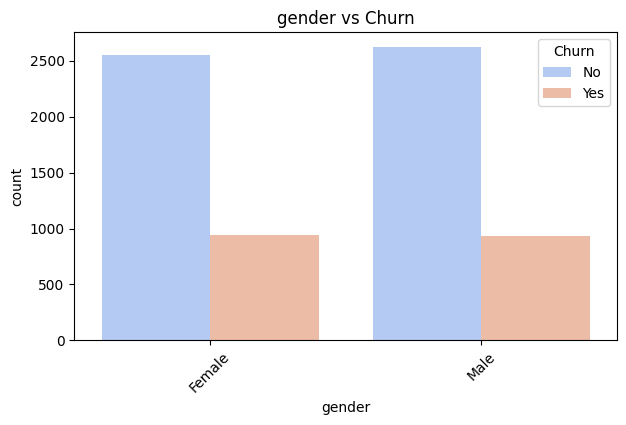

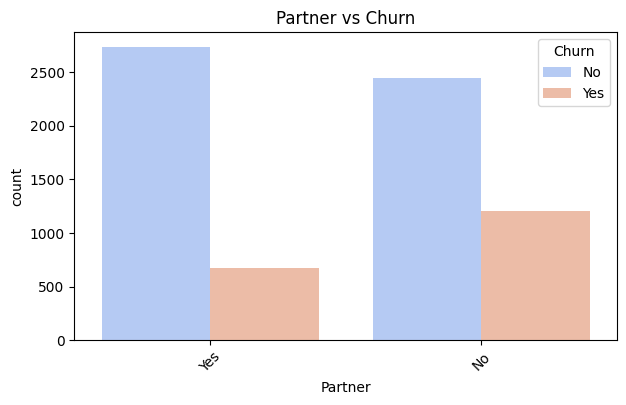

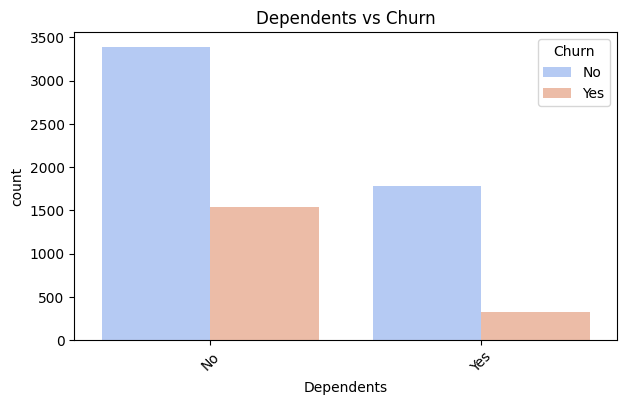

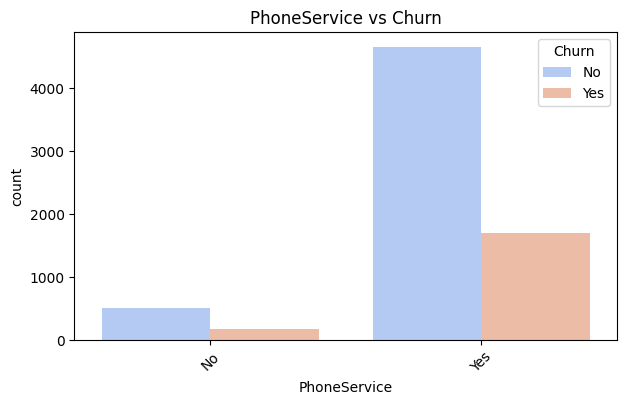

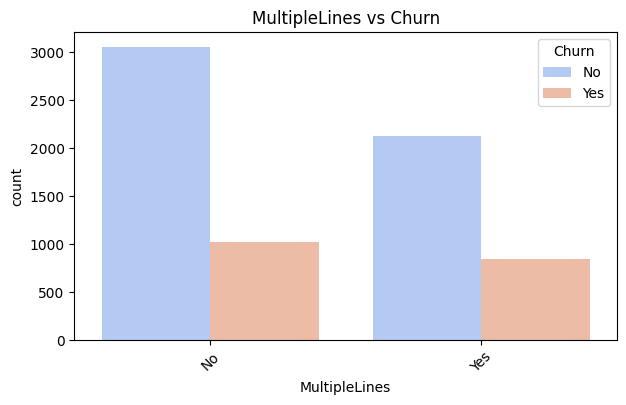

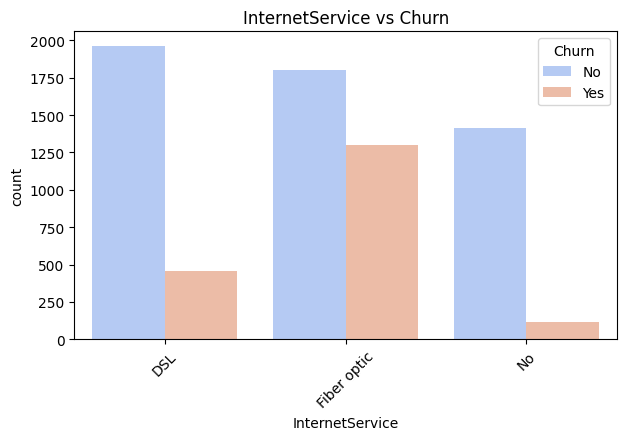

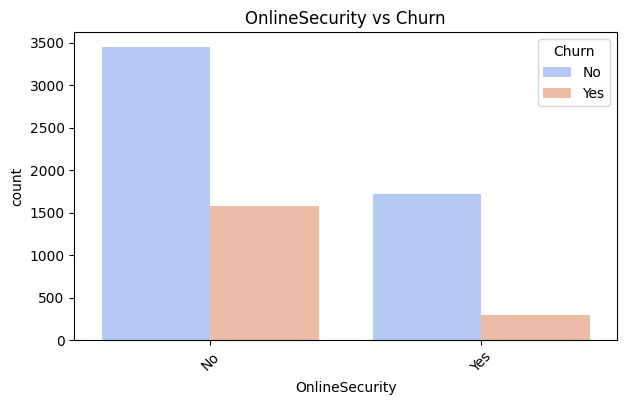

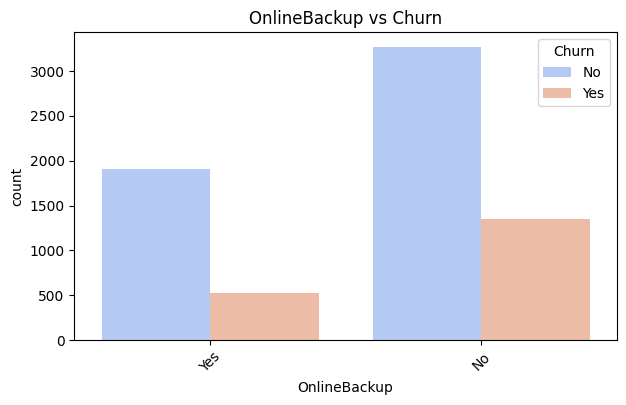

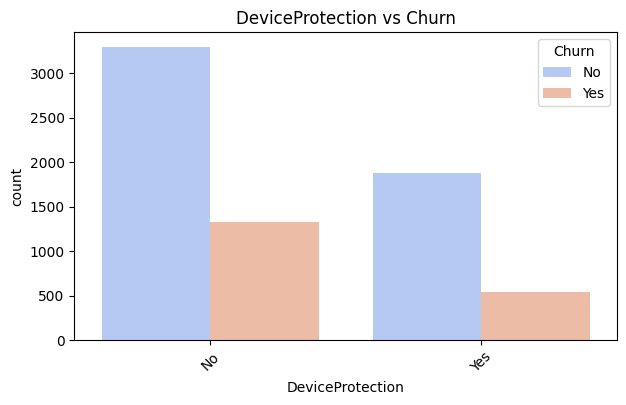

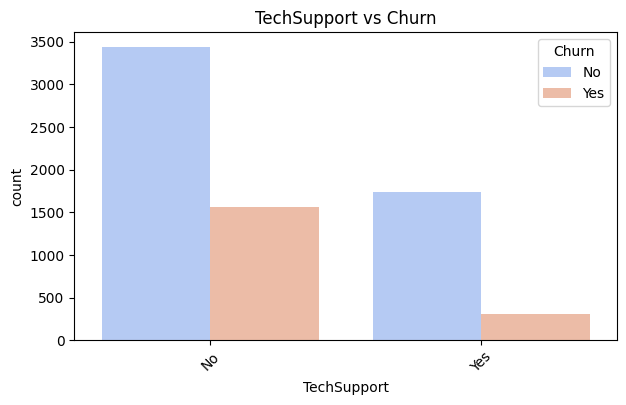

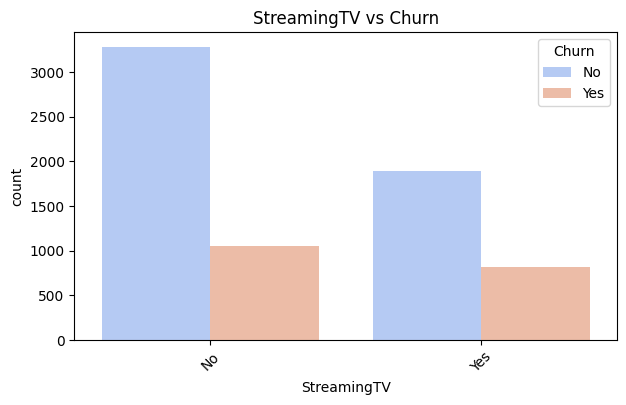

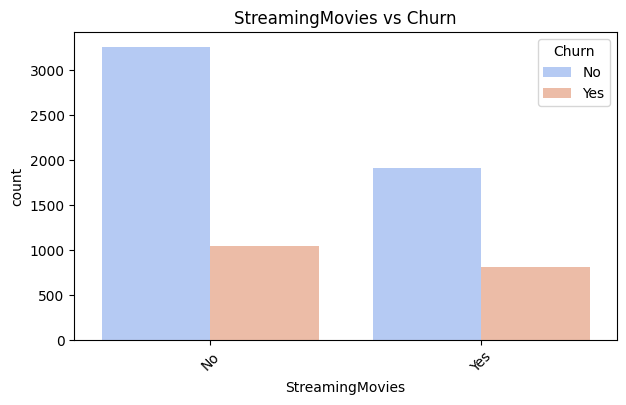

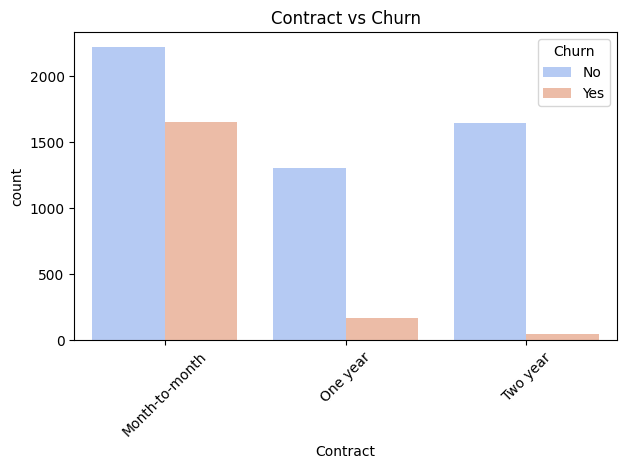

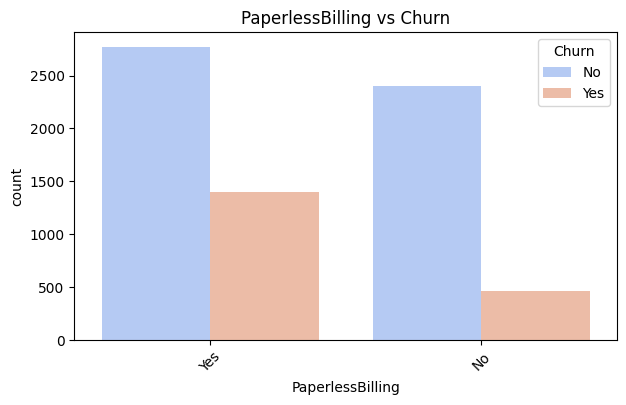

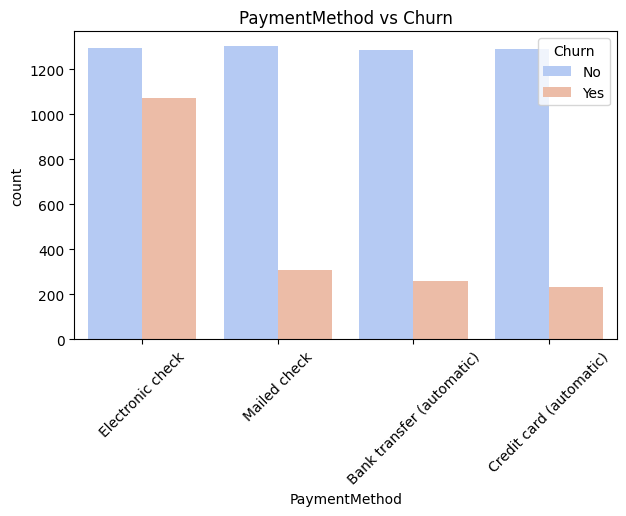

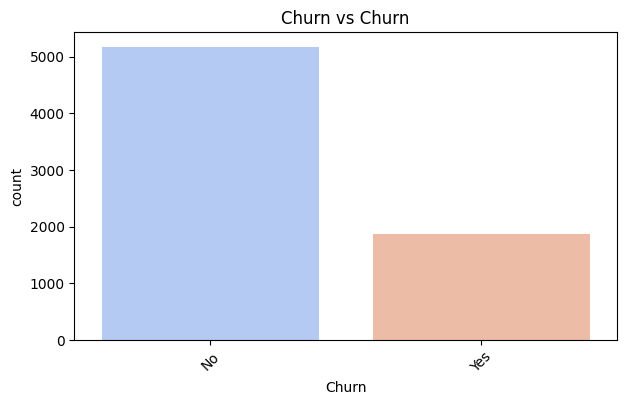

In [22]:
for col in df_categorical_col:
    plt.figure(figsize=(7,4))
    sns.countplot(data=df_categorical_col, x=col, hue='Churn', palette='coolwarm')
    plt.title(f'{col} vs Churn')
    plt.xticks(rotation=45)
    plt.show()

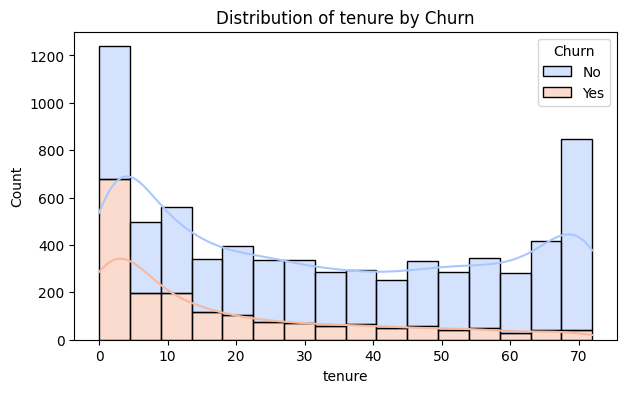

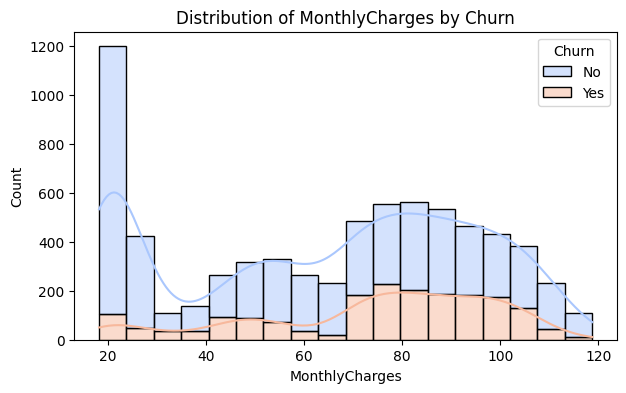

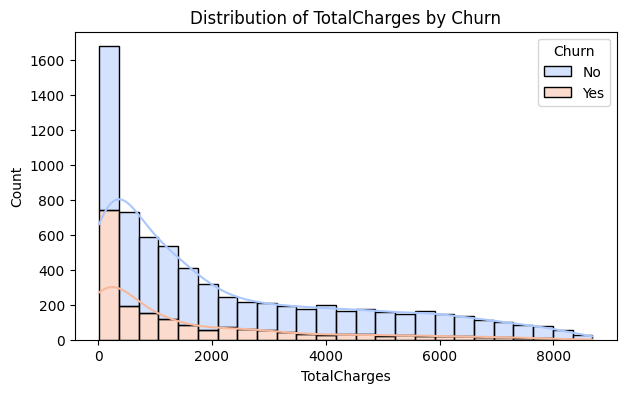

In [23]:
num_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

for col in num_features:
    plt.figure(figsize=(7, 4))
    sns.histplot(data=df, x=col, hue='Churn', kde=True, multiple='stack', palette='coolwarm')
    plt.title(f'Distribution of {col} by Churn')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()


2) Data Preprocessing

In [25]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
#remove rows which contain null values because there is less null value so we just remove it

df = df.dropna()

In [28]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [33]:
#data encoding
#label encoding to binary columns
binary_col = ["gender","Partner", "Dependents", "PhoneService", "MultipleLines", 
              "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", 
              "StreamingMovies", "PaperlessBilling", "Churn"]

for col in binary_col:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])


In [35]:
#one hot encoding to categorical columns

multi_cols = ['Contract', 'InternetService', 'PaymentMethod']

ohe = OneHotEncoder(drop='first', sparse_output=False)
encoded = ohe.fit_transform(df[multi_cols])
encoded_df = pd.DataFrame(encoded, columns=ohe.get_feature_names_out(multi_cols))
df = pd.concat([df.drop(columns=multi_cols), encoded_df], axis=1)

In [38]:
# Move Churn to the last column
churn = df.pop('Churn')
df['Churn'] = churn
# Convert all float columns with .0 to int



In [40]:
df.isnull().sum()

gender                                   11
SeniorCitizen                            11
Partner                                  11
Dependents                               11
tenure                                   11
PhoneService                             11
MultipleLines                            11
OnlineSecurity                           11
OnlineBackup                             11
DeviceProtection                         11
TechSupport                              11
StreamingTV                              11
StreamingMovies                          11
PaperlessBilling                         11
MonthlyCharges                           11
TotalCharges                             11
Contract_One year                        11
Contract_Two year                        11
InternetService_Fiber optic              11
InternetService_No                       11
PaymentMethod_Credit card (automatic)    11
PaymentMethod_Electronic check           11
PaymentMethod_Mailed check      

In [41]:
df = df.dropna()

In [42]:
df.isnull().sum()

gender                                   0
SeniorCitizen                            0
Partner                                  0
Dependents                               0
tenure                                   0
PhoneService                             0
MultipleLines                            0
OnlineSecurity                           0
OnlineBackup                             0
DeviceProtection                         0
TechSupport                              0
StreamingTV                              0
StreamingMovies                          0
PaperlessBilling                         0
MonthlyCharges                           0
TotalCharges                             0
Contract_One year                        0
Contract_Two year                        0
InternetService_Fiber optic              0
InternetService_No                       0
PaymentMethod_Credit card (automatic)    0
PaymentMethod_Electronic check           0
PaymentMethod_Mailed check               0
Churn      

In [43]:
#save dataset

df.to_csv("../data/processed/cleaned_churn_data.csv", index=False)
